<a href="https://colab.research.google.com/github/rahulsingh731/Aerial-Cactus-Challenge/blob/master/Aerial_Cactus_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# !unzip aerial-cactus-identification.zip
# !unzip test.zip

In [0]:
train_directory = 'train'
test_directory = 'test'

In [0]:
df = pd.read_csv('train.csv')
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


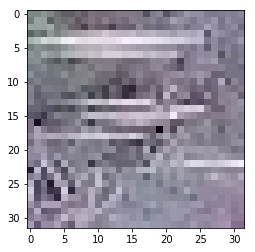

In [0]:
img = cv2.imread('train/0004be2cfeaba1c0361d39e2b000257b.jpg')
plt.imshow(img)

In [0]:
img.shape

(32, 32, 3)

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [0]:
df['has_cactus'] = df['has_cactus'].astype(str)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'training',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)
test_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'validation',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)

Found 14875 validated image filenames belonging to 2 classes.
Found 2625 validated image filenames belonging to 2 classes.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3) ,activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(), 
    metrics = ['accuracy']
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 64
)

Epoch 1/10
2000/2000 [==============================] - 53s 26ms/step - loss: 0.1140 - acc: 0.9555 - val_loss: 0.0464 - val_acc: 0.9839
Epoch 2/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0558 - acc: 0.9800 - val_loss: 0.0609 - val_acc: 0.9802
Epoch 3/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0446 - acc: 0.9839 - val_loss: 0.0467 - val_acc: 0.9846
Epoch 4/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0407 - acc: 0.9852 - val_loss: 0.0349 - val_acc: 0.9871
Epoch 5/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0326 - acc: 0.9885 - val_loss: 0.0547 - val_acc: 0.9829
Epoch 6/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0279 - acc: 0.9896 - val_loss: 0.0356 - val_acc: 0.9886
Epoch 7/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0252 - acc: 0.9908 - val_loss: 0.0512 - val_acc: 0.9861
Epoch 8/10
2000/2000 [==========================

In [0]:
ids = []
X_test = []

for image in os.listdir(test_directory):
    ids.append(image.split('.')[0])
    path = os.path.join(test_directory, image)
    X_test.append(cv2.imread(path))
    
X_test = np.array(X_test)
X_test = X_test.astype('float32') / 255

In [0]:
predictions = model.predict(X_test)

In [0]:
submission = pd.read_csv('sample_submission.csv')
submission['has_cactus'] = predictions
submission['id'] = ids

In [0]:
submission.head(10)

,id,has_cactus
0,2c3f3a4f3216652889d4ea1dd1dcfa91,1.000000
1,eada284c2a32c7ef7c5803610a4557ed,0.968228
2,95cb80fb42e1e827af4e9e569966f77a,1.000000
3,660476817655bd3baa1eb4675568862c,0.831068
4,0188f5ba08afcb5fa036a8c48aff1d1a,1.000000
5,57fa44b130fefce32e5e0350d0d560c6,1.000000
6,cdeb3554ed94913a1de67a4dc7089965,1.000000
7,51db5df5aada564fab41be9a5a3074a2,1.000000
8,52a1994668709cc8d4f247b42685ad75,1.000000
9,644017bef843b53be8a5c85221fe2f4c,1.000000


In [0]:
submission.to_csv('submission.csv', index = False)

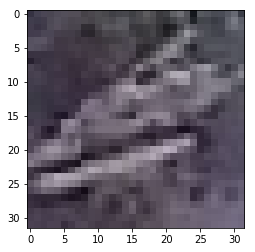

In [0]:
plt.imshow(cv2.imread('test/2c3f3a4f3216652889d4ea1dd1dcfa91.jpg'))